In [2]:
import os
import tensorflow as tf
import numpy as np
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

In [2]:
''' Data Augmentatioon'''
train_ds = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

''' flow from directory '''
train_ds = train_ds.flow_from_directory(r'C:\Users\user\Desktop\training', target_size=(64, 64), 
                                        batch_size=32, class_mode='binary')

Found 5035 images belonging to 2 classes.


In [3]:
''' Scaling '''
test_ds = ImageDataGenerator(rescale = 1./255)

''' flow from directory '''
test_ds = test_ds.flow_from_directory(r'C:\Users\user\Desktop\test', target_size=(64, 64), batch_size=32, 
                                      class_mode='binary')

Found 962 images belonging to 2 classes.


In [4]:
''' container '''
model = tf.keras.models.Sequential()

In [5]:
''' addding layers to convtainer '''
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

In [6]:
''' adding max pool layer '''
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [7]:
''' 2nd convolutional layer '''
model.add(tf.keras.layers.Conv2D(filters = 32,kernel_size = 3, activation = 'relu'))

''' 2nd max pool layer '''
model.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))

In [8]:
''' flattening '''
model.add(tf.keras.layers.Flatten())

In [9]:
''' Hidden Layer '''
model.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [10]:
''' compile the model '''
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
''' training '''
model.fit(x=train_ds, validation_data=test_ds, epochs=25)

Epoch 1/25
158/158 [==============================] - 103s 648ms/step - loss: 2.2038 - accuracy: 0.0089 - val_loss: 0.7944 - val_accuracy: 0.0249
Epoch 2/25
158/158 [==============================] - 101s 641ms/step - loss: 0.9686 - accuracy: 0.0113 - val_loss: 0.6283 - val_accuracy: 0.0000e+00
Epoch 3/25
158/158 [==============================] - 101s 641ms/step - loss: 0.4732 - accuracy: 0.0071 - val_loss: 0.2619 - val_accuracy: 0.0000e+00
Epoch 4/25
158/158 [==============================] - 101s 640ms/step - loss: 0.3135 - accuracy: 0.0354 - val_loss: 0.1558 - val_accuracy: 0.0665
Epoch 5/25
158/158 [==============================] - 101s 639ms/step - loss: 0.2255 - accuracy: 0.0947 - val_loss: 0.1300 - val_accuracy: 0.3825
Epoch 6/25
158/158 [==============================] - 101s 638ms/step - loss: 0.2042 - accuracy: 0.1138 - val_loss: 0.1098 - val_accuracy: 0.4740
Epoch 7/25
158/158 [==============================] - 100s 634ms/step - loss: 0.1825 - accuracy: 0.2044 - val_loss: 

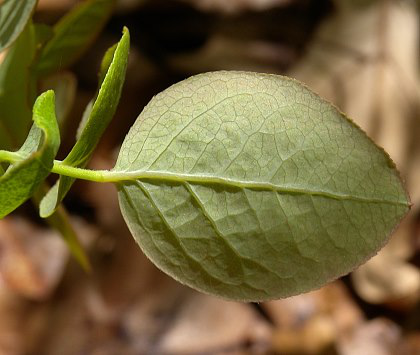

In [3]:
''' plotting image '''
image.load_img('1.jpg')

In [33]:
''' prediction '''
test_img = image.load_img('1.jpg', target_size = (64, 64))

''' converting image to array '''
img = image.img_to_array(test_img)

''' expanding dimension '''
img = np.expand_dims(img, axis = 0)

''' prediction '''
r = model.predict(img)

train_ds.class_indices

if r[0][0] == 1:
    pred = 'ill'
else:
    pred = 'good'

In [34]:
print(pred)

good
